### 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [20]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## (2) 모델에 입력할 데이터 X 준비하기
## (3) 모델에 입력할 데이터 X 준비하기

In [21]:
df_X = diabetes['data']
df_y = diabetes['target']
print(type(df_X), df_X.shape)
print(type(df_y), df_y.shape)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


## (4) train 데이터와 test 데이터로 분리하기

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [56]:
# 모델 함수
def model(X, W, b):
    predictions = 0
    for i in range(X_train.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [26]:
# 손실함수: MSE
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = ((predictions - y) ** 2).mean()  # 두 값의 차이의 제곱의 평균    
    return L

## (7)기울기를 구하는 gradient 함수 구현하기

In [46]:
import matplotlib.pyplot as plt

# 기울기 함수
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
        
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


'''
학습 함수
    학습률 및 횟수를 지정하여 학습 진행 및 시각화
    학습 결과 파라메터 W, b 반환
''' 
def linear_regression_fit(X, y, W, b, l_rate = 0.0001, cnt = 1000):    
    losses = []
    for i in range(1, (cnt + 1)):
        dW, db = gradient(X, W, b, y)
        W -= l_rate * dW
        b -= l_rate * db
        L = loss(X, W, b, y)
        losses.append(L)
        if i % 10 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    plt.plot(losses)
    plt.show()
    return (W, b)

## (8) 하이퍼 파라미터인 학습률 설정하기
## (9) 모델 학습하기

Start(W, b): [0.10399546 0.08687322 0.3301101  0.56585067 0.36786403 0.11446236
 0.74444266 0.1075485  0.42546905 0.10810068] 0.5700795479074707
Iteration 10 : Loss 6259.6916
Iteration 20 : Loss 5916.1501
Iteration 30 : Loss 5839.2762
Iteration 40 : Loss 5767.7378
Iteration 50 : Loss 5698.4455
Iteration 60 : Loss 5631.2893
Iteration 70 : Loss 5566.1967
Iteration 80 : Loss 5503.0978
Iteration 90 : Loss 5441.9251
Iteration 100 : Loss 5382.6136
Iteration 110 : Loss 5325.1005
Iteration 120 : Loss 5269.3253
Iteration 130 : Loss 5215.2294
Iteration 140 : Loss 5162.7564
Iteration 150 : Loss 5111.8519
Iteration 160 : Loss 5062.4633
Iteration 170 : Loss 5014.5399
Iteration 180 : Loss 4968.0326
Iteration 190 : Loss 4922.8941
Iteration 200 : Loss 4879.0790
Iteration 210 : Loss 4836.5431
Iteration 220 : Loss 4795.2438
Iteration 230 : Loss 4755.1403
Iteration 240 : Loss 4716.1928
Iteration 250 : Loss 4678.3631
Iteration 260 : Loss 4641.6144
Iteration 270 : Loss 4605.9109
Iteration 280 : Loss 4571.2

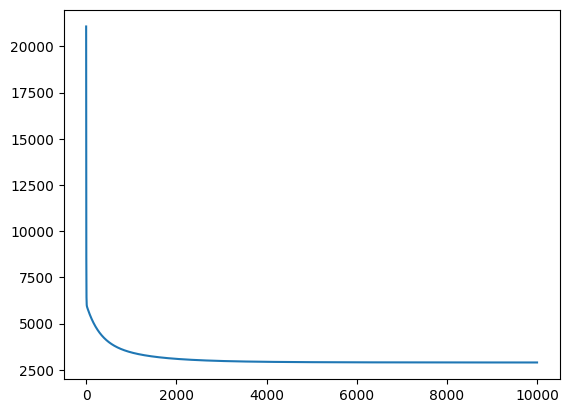

End(W, b): [  39.93056427 -236.71311601  550.30220599  340.35321212  -98.09344615
 -127.09449142 -215.83850468  148.91677584  411.086848     71.81079936] 151.30379217407184


In [58]:
import numpy as np

# 초기 파라메터: W 백터, b 상수
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
print('Start(W, b):', W, b)

# 학습률
LEARNING_RATE = 0.1

# 학습
(W, b) = linear_regression_fit(X_train, y_train, W, b, LEARNING_RATE, 10000)
print('End(W, b):', W, b)


## (10) test 데이터에 대한 성능 확인하기

In [60]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print('mse:', mse)

mse: 2880.208444248326


## (11) 정답 데이터와 예측한 데이터 시각화하기

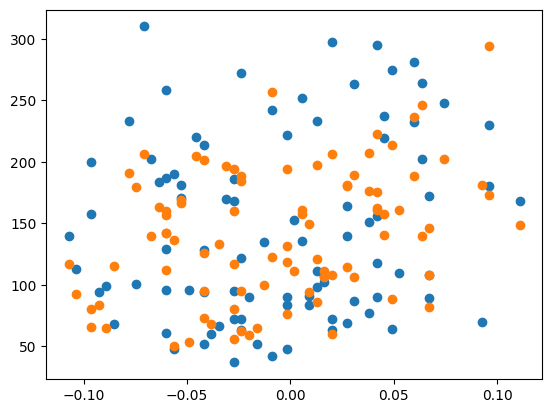

In [61]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()